In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from math import log
from sklearn import linear_model


In [3]:
data=pd.read_csv("/home/rajnish/Desktop/IIT MADRAS M.Tech DSAI 2026/DAL(DATA ANALYTICS LABORATORY)/Assignments/Assignments2/Assignment2.data",sep='\t')
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [5]:
data.describe()

,SpringPos,StockPrice
count,226.000000,226.000000
mean,3.785221,14.187743
std,10.704778,7.447450
min,-19.910000,0.670000
25%,-3.960000,8.355000
50%,4.195000,13.970000
75%,11.295000,19.632500
max,26.100000,30.050000


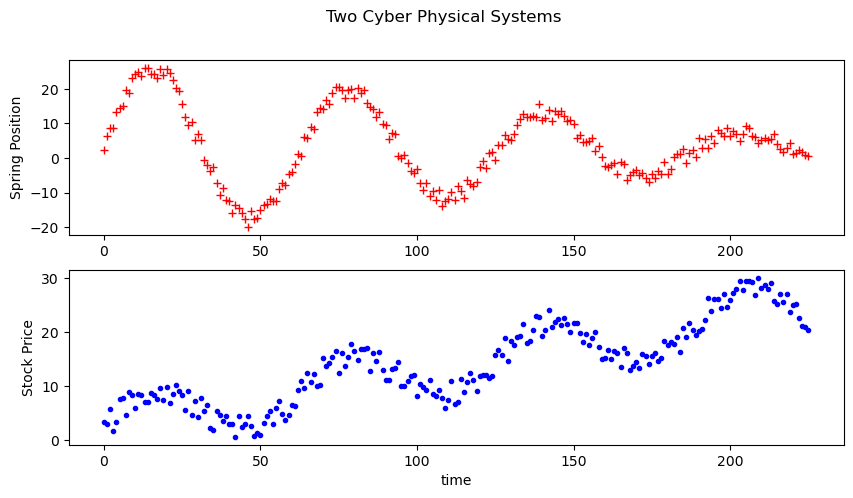

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.suptitle('Two Cyber Physical Systems')
fig.set_figwidth(10)
fig.set_figheight(5)

ax1.plot(data.SpringPos, 'r+')
ax1.set_ylabel('Spring Position')
ax2.plot(data.StockPrice, 'b.')
ax2.set_ylabel('Stock Price')
ax2.set_xlabel('time')


plt.show()

# Spring Positon Dataset

# Task 1

1. Implement the OLS closed form solution using numpy’s matrix operators to find the value of ‘m’ that minimizes SSE.

In [12]:
y2 = pd.DataFrame({"x":range(226), "y":data.SpringPos})

y2.head

<bound method NDFrame.head of        x      y
0      0   2.27
1      1   6.38
2      2   8.61
3      3   8.65
4      4  13.17
..   ...    ...
221  221   1.37
222  222   2.29
223  223   1.80
224  224   0.82
225  225   0.59

[226 rows x 2 columns]>

In [14]:
yy=np.array(y2.y)
xx=np.expand_dims(y2.x,axis=1)

In [16]:
numerator = np.matmul(np.transpose(xx), yy)
denom = np.matmul(np.transpose(xx), xx)
denom_inv = np.linalg.inv(denom)
beta = np.matmul(denom_inv, numerator)
print("Beta = ", beta[0])
sse = np.sum((xx*beta[0] - np.expand_dims(yy,1))**2)
print("SSE = ", sse)

Beta =  0.018321754998724567
SSE =  27738.298279267474


In [17]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

Text(0.5, 0, 'Time')

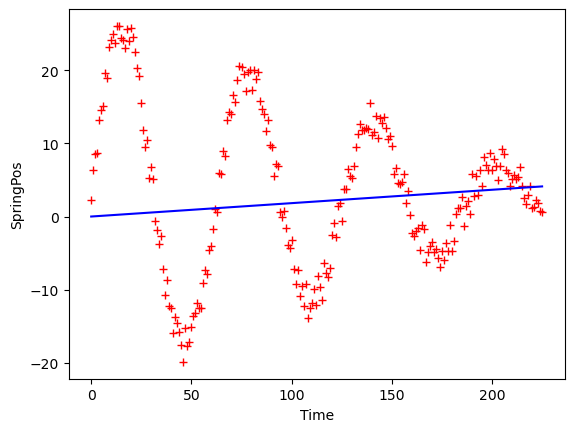

In [19]:
plt.plot(y2.x, y2.y, 'r+')
yhat1 = predict(beta, y2.x)
plt.plot(y2.x, yhat1, 'b-')  # yhat = y2.x*beta[0]
plt.ylabel('SpringPos')
plt.xlabel('Time')

In [21]:
y2df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.SpringPos})
yy = np.array(y2df.y) 
xx = np.array(y2df[["bias","x"]])
y2df.head()

,bias,x,y
0,1.0,0,2.27
1,1.0,1,6.38
2,1.0,2,8.61
3,1.0,3,8.65
4,1.0,4,13.17


In [22]:
beta2 = estimateBeta(xx, yy)
print("beta =", beta2)
yhat2 = predict(beta2, xx)
loss = SSE(yy, yhat2)
print("SSE =", loss)

beta = [ 6.8505263  -0.02724716]
SSE = 25069.131971939343


Text(0.5, 0, 'Time')

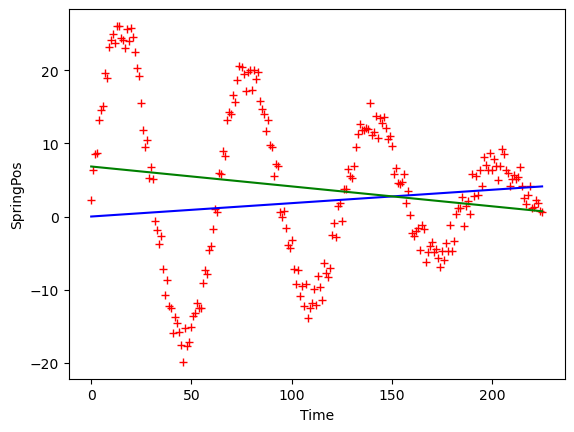

In [25]:
plt.plot(y2df.x, y2df.y, 'r+')
plt.plot(y2df.x, yhat1, 'b-')
plt.plot(y2df.x, yhat2, 'g-')
plt.ylabel('SpringPos')
plt.xlabel('Time')

In [27]:
x1 = round(y2.x*beta2[1],2)
x2 = np.sin(x1)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "x2":x2, "y":data.SpringPos})
y21.head(10)

,bias,x,x1,x2,y
0,1.0,0,-0.00,-0.000000,2.27
1,1.0,1,-0.03,-0.029996,6.38
2,1.0,2,-0.05,-0.049979,8.61
3,1.0,3,-0.08,-0.079915,8.65
4,1.0,4,-0.11,-0.109778,13.17
5,1.0,5,-0.14,-0.139543,14.52
6,1.0,6,-0.16,-0.159318,15.12
7,1.0,7,-0.19,-0.188859,19.62
8,1.0,8,-0.22,-0.218230,18.91
9,1.0,9,-0.25,-0.247404,23.17


In [28]:
xx = np.array(y21[['bias', 'x1', 'x2']])
yy = np.array(y2.y) 

In [29]:
beta3 = estimateBeta(xx, yy)
print("Beta = ", beta3)
yhat3 = predict(beta3, xx)
loss = SSE(yy, yhat3) #np.sum((np.matmul(xx,beta) - yy)**2)
print("SSE = ", loss)

Beta =  [11.99634589  2.6761454   5.21496085]
SSE =  23939.673440425053


Text(0.5, 0, 'Time')

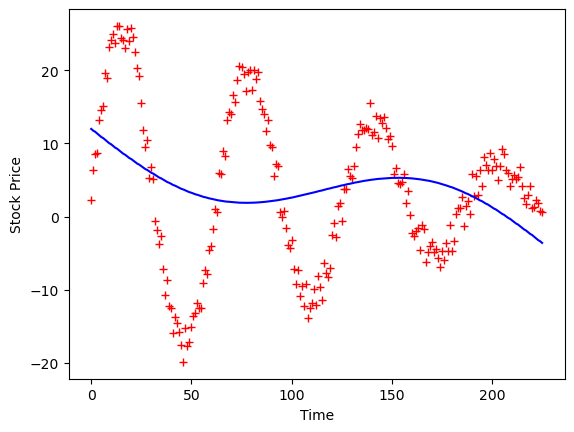

In [30]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat3, 'b-')
plt.ylabel('Stock Price')
plt.xlabel('Time')

In [31]:

print("Best best=",beta3)
print("SSE=",loss)

Best best= [11.99634589  2.6761454   5.21496085]
SSE= 23939.673440425053


2. Implement a linear search (the single parameter search version of grid search) for m = tan θ,where θ in [0, 60] in steps of 5 degrees and measure the SSE at every choice of θ. Create a plot that shows SSE vs θ. Report the θ, that minimizes SSE.



In [39]:
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [40]:
import numpy as np
import matplotlib.pyplot as plt
y2 = pd.DataFrame({"x":range(226), "y":data.SpringPos})

y2.head

<bound method NDFrame.head of        x      y
0      0   2.27
1      1   6.38
2      2   8.61
3      3   8.65
4      4  13.17
..   ...    ...
221  221   1.37
222  222   2.29
223  223   1.80
224  224   0.82
225  225   0.59

[226 rows x 2 columns]>

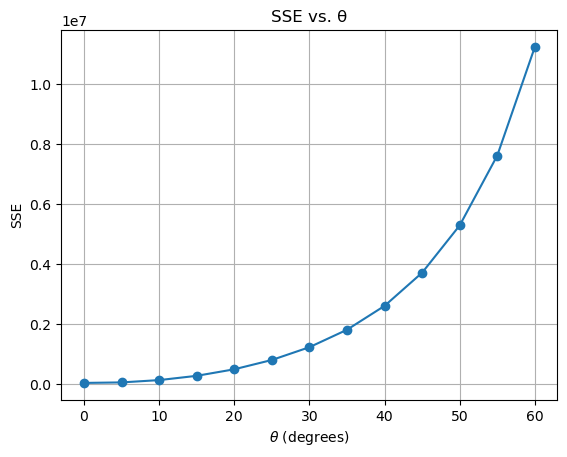

(0, 29021.3684)

In [43]:
# Define the SSE function
def compute_sse(m, x, y):
    # SSE = Sum of Squared Errors
    y_pred = m * x
    sse = np.sum((y - y_pred) ** 2)
    return sse

# Generate range of theta values from 0 to 60 degrees in steps of 5 degrees
theta_values = np.arange(0, 65, 5)
sse_values = []

# Linear search through theta values
for theta in theta_values:
    m = np.tan(np.radians(theta))  # Convert theta to radians and compute m = tan(theta)
    sse = compute_sse(m, y2.x, y2.y)
    sse_values.append(sse)

# Find the theta that minimizes SSE
min_sse = min(sse_values)
min_theta = theta_values[sse_values.index(min_sse)]

# Plot SSE vs. theta
plt.plot(theta_values, sse_values, marker='o')
plt.xlabel(r'$\theta$ (degrees)')
plt.ylabel('SSE')
plt.title('SSE vs. θ')
plt.grid(True)
plt.show()

# Report the theta that minimizes SSE
min_theta, min_sse


In [44]:
print("Degree=",min_theta)
print("Min SSE=",min_sse)

Degree= 0
Min SSE= 29021.3684


3. Implement the solution using sklearn’s LinearRegression class.

In [48]:
x1 = round(y2.x*beta2[1],2)

y21 = pd.DataFrame({"bias":np.ones(226),"x":range(226), "x1":x1, "y":data.SpringPos})
y21.head(10)

,bias,x,x1,y
0,1.0,0,-0.00,2.27
1,1.0,1,-0.03,6.38
2,1.0,2,-0.05,8.61
3,1.0,3,-0.08,8.65
4,1.0,4,-0.11,13.17
5,1.0,5,-0.14,14.52
6,1.0,6,-0.16,15.12
7,1.0,7,-0.19,19.62
8,1.0,8,-0.22,18.91
9,1.0,9,-0.25,23.17


In [50]:
xx = np.array(y21[['x1']])
yy = np.array(y2.y) 

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly_transformer = PolynomialFeatures(degree = 13)   # 10, 11
X_poly = poly_transformer.fit_transform(xx)

In [54]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_poly, yy)
print("Intercept=", model.intercept_, "Beta = ", model.coef_)
yhat4 = model.predict(X_poly)

#beta4 = estimateBeta(X_poly, yy)
#print("Beta = ", beta4)
#yhat4 = predict(beta4, X_poly)

loss = SSE(yy, yhat4)
print("SSE = ", loss)

Intercept= 0.293616046515186 Beta =  [ 0.00000000e+00 -2.06441277e+02 -1.04583418e+03 -3.63706596e+03
 -7.56189522e+03 -9.08269089e+03 -6.68912345e+03 -3.18570962e+03
 -1.01268219e+03 -2.17159528e+02 -3.10540238e+01 -2.83995828e+00
 -1.50319584e-01 -3.50433389e-03]
SSE =  566.4749621894289


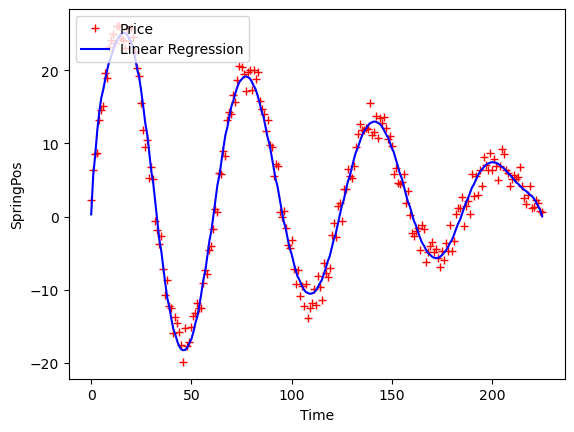

In [56]:
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat4, 'b-')
plt.ylabel('SpringPos')
plt.xlabel('Time')
plt.legend(['Price', 'Linear Regression'], loc='upper left')
plt.show()

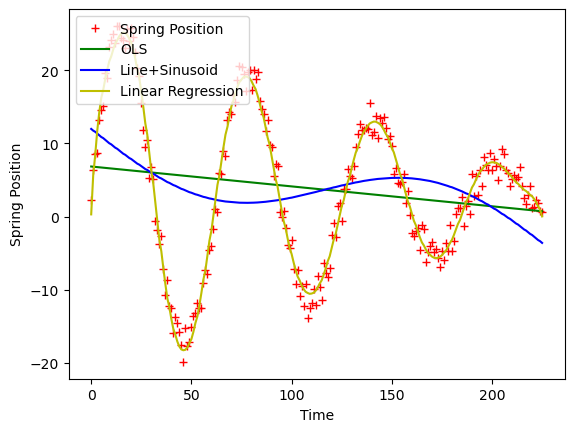

In [58]:
plt.ylabel('Spring Position')
plt.xlabel('Time')
plt.plot(y2.x, y2.y, 'r+')
plt.plot(y2.x, yhat2, 'g-')
plt.plot(y2.x, yhat3, 'b-')
plt.plot(y2.x, yhat4, 'y-')

# plt.plot(y2.x, yhat2, '--')
# plt.plot(y2.x, yhat3, 'k')
plt.legend(['Spring Position', 'OLS','Line+Sinusoid','Linear Regression'], loc='upper left')
plt.show()

# Task 2 (Spring Position Dataset)

You will notice that the linear model is an ok fit for the y2. What should be the mathematical model of stock price dataset? If you notice the periodicity in the data, you should factor that in your mathematical model using an appropriate function that’s periodic. The challenge here is; the trend of the magnitude is also increasing, which you confirmed in your previous task. So, the math model should consider both properties.

1. Split your data into Train, Eval & Test.
   #i. Interpolation: When you randomly split the data into train, eval and test; your test and evaluation data points may be inside the data range (time range). When you can predict those points correctly, you are essentially recovering missing data in the regression line.This is also called the interpolation problem.
   ii. Extrapolation: In this scenario, the test and eval points should be outside the time range of the training data. If your model is a good fit, and when you predict the data point outside the range, you are essentially extrapolating the regression line. This is also called the “Forecasting” task.
   

In [63]:
data

,SpringPos,StockPrice
0,2.27,3.48
1,6.38,2.99
2,8.61,5.86
3,8.65,1.79
4,13.17,3.47
...,...,...
221,1.37,25.14
222,2.29,22.65
223,1.80,21.04
224,0.82,20.98


In [65]:
df = pd.DataFrame({"bias":np.ones(226), "x":range(226), "y":data.SpringPos})

In [67]:
amplitude = (df[['y']].max() - df[['y']].min()) / 2
b = 0.005
w = 2 * np.pi / 62
x_wave = np.exp(-1*b*df[['x']])*np.sin(w*df[['x']]) @ [amplitude] 
x_wave

,0
0,0.000000
1,2.315769
2,4.584795
3,6.784317
4,8.892516
...,...
221,-3.004797
222,-3.679319
223,-4.309471
224,-4.889245


In [69]:
df = pd.DataFrame({"bias":np.ones(226), "x":range(226)})
df["x_wave"]=x_wave
df["y"]=data.SpringPos
df

,bias,x,x_wave,y
0,1.0,0,0.000000,2.27
1,1.0,1,2.315769,6.38
2,1.0,2,4.584795,8.61
3,1.0,3,6.784317,8.65
4,1.0,4,8.892516,13.17
...,...,...,...,...
221,1.0,221,-3.004797,1.37
222,1.0,222,-3.679319,2.29
223,1.0,223,-4.309471,1.80
224,1.0,224,-4.889245,0.82


In [71]:
yy = np.array(df.y) 
xx = np.array(df[["bias","x","x_wave"]])

In [73]:
# from sklearn.model_selection import train_test_split
# import numpy as np
# X_train,X_test,Y_train,Y_test=train_test_split(xx, yy, test_size=0.2, random_state=42)

In [91]:
X_train=xx[0:150]
Y_train=yy[0:150]

X_test=xx[151:190]
Y_test=yy[151:190]

X_val=xx[191:226]
Y_val=yy[191:226]


In [93]:
# X_train,X_val,Y_train,Y_val=train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

2. Implement the regression model (OLS or LinearRegression or equivalent) using appropriate feature transformation so that the SSE is lower than that of Task 1.

In [96]:
# estimate the value of the beta vector assuming that X is made of independent features.
def estimateBeta(X, y):
    numerator = np.matmul(np.transpose(X), y)
    denom = np.matmul(np.transpose(X), X)
    denom_inv = np.linalg.inv(denom)
    beta = np.matmul(denom_inv, numerator)
    return beta

# create a helper that would estimate yhat from X and beta.
def predict(beta, X):
    # reshape the input to a matrix, if it is appearing like an 1d array.
    if len(X.shape) != 2:
        X = np.expand_dims(X,1)
    # convert the beta list in to an array.
    beta = np.array(beta)
    # perform estimation of yhat.
    return np.matmul(X, beta)

# compute the sum of squared error between y and yhat.
def SSE(y, yhat):
    return np.sum((y-yhat)**2)

In [97]:
beta2 = estimateBeta(X_train, Y_train)
print("beta =", beta2)
yhat2 = predict(beta2, xx)
loss = SSE(yy, yhat2)
print("SSE =", loss)

beta = [ 3.27105085 -0.01081526  1.07445614]
SSE = 1275.8209305525415


3. Train the regression model for interpolation and evaluate the SSE.

In [100]:
beta2 = estimateBeta(X_train, Y_train)
print("beta =", beta2)
yhat2 = predict(beta2, X_test)
loss = SSE(Y_test, yhat2)
print("SSE =", loss)

beta = [ 3.27105085 -0.01081526  1.07445614]
SSE = 439.31735123875734


4. Train the regression model for extrapolation and evaluate the SSE.

In [103]:
beta2 = estimateBeta(X_train, Y_train)
print("beta =", beta2)
yhat2 = predict(beta2, X_val)
loss = SSE(Y_val, yhat2)
print("SSE =", loss)

beta = [ 3.27105085 -0.01081526  1.07445614]
SSE = 339.28517334567607
